# Bibliotecas

In [ ]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sb
%pip install matplotlib
import matplotlib.pyplot as plot

# API -Tesouro Transparente

In [ ]:
url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'

# Organizando o Dataframe

In [ ]:
df = pd.read_csv(url, sep =';')
df.tail()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
134433,Tesouro IPCA+ com Juros Semestrais,15/08/2008,27/09/2006,"9,55","9,57","1520,54","1520,05","1519,43"
134434,Tesouro IPCA+ com Juros Semestrais,15/05/2009,27/09/2006,"9,60","9,64","1510,32","1509,00","1508,38"
134435,Tesouro IPCA+ com Juros Semestrais,15/05/2007,27/09/2006,"9,44","9,46","1604,92","1604,75","1604,10"
134436,Tesouro IPCA+,15/08/2024,27/09/2006,"7,91","7,99","412,18","406,78","406,64"
134437,Tesouro IPCA+,15/05/2015,27/09/2006,"8,94","9,00","766,07","762,46","762,16"


# Organizando Datas

In [ ]:
df['Data Base']       = pd.to_datetime(df['Data Base']      , dayfirts = True)
df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirts = True)

TypeError: ignored

# Análise Exploratória do Dataframe

In [ ]:
#Tamanho do corpo(linhas e colunas)
df.shape

(134438, 8)

In [ ]:
#Verificando valores faltantes
df.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [ ]:
# 1° Verificando Títulos únicos
titulo = df['Tipo Titulo'].unique()
titulo

array(['Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Prefixado com Juros Semestrais', 'Tesouro Selic',
       'Tesouro Prefixado', 'Tesouro IPCA+ com Juros Semestrais',
       'Tesouro IPCA+', 'Tesouro Renda+ Aposentadoria Extra',
       'Tesouro Educa+'], dtype=object)

In [ ]:
# 2° Verificando Data base únicos
data_base = df['Data Base'].unique()
data_base

array(['04/08/2005', '03/08/2005', '02/08/2005', ..., '22/08/2006',
       '29/09/2006', '28/09/2006'], dtype=object)

In [ ]:
df.head()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,01/03/2011,04/08/2005,"8,50","8,56","1683,16","1678,86","1678,23"
1,Tesouro IGPM+ com Juros Semestrais,01/04/2021,04/08/2005,"8,40","8,48","1499,95","1489,54","1488,98"
2,Tesouro IGPM+ com Juros Semestrais,01/01/2031,04/08/2005,"8,40","8,50","2518,99","2495,14","2494,21"
3,Tesouro Prefixado com Juros Semestrais,01/01/2010,04/08/2005,"16,76","16,82","816,35","814,87","814,37"
4,Tesouro Prefixado com Juros Semestrais,01/01/2008,04/08/2005,"17,40","17,46","878,50","877,54","876,98"


In [ ]:
# 3° Verificando Vencimentos únicos
data_vencimento=df['Data Vencimento'].unique()
data_vencimento

array(['01/03/2011', '01/04/2021', '01/01/2031', '01/01/2010',
       '01/01/2008', '17/01/2007', '18/06/2008', '18/03/2009',
       '18/01/2006', '01/07/2006', '01/01/2006', '01/10/2005',
       '01/10/2006', '01/01/2007', '01/07/2007', '01/04/2006',
       '15/08/2024', '15/05/2045', '15/05/2015', '15/05/2009',
       '15/05/2007', '15/08/2006', '01/12/2005', '01/12/2006',
       '01/04/2008', '01/07/2017', '01/04/2007', '15/08/2008',
       '01/07/2005', '01/04/2005', '16/02/2005', '04/01/2005',
       '01/07/2008', '01/01/2012', '17/03/2010', '15/05/2035',
       '15/05/2055', '15/08/2032', '15/05/2029', '15/08/2026',
       '01/01/2025', '01/01/2029', '01/01/2033', '01/01/2027',
       '15/12/2064', '15/12/2059', '15/12/2054', '15/12/2079',
       '15/12/2049', '15/12/2069', '15/12/2084', '15/12/2074',
       '15/12/2040', '15/12/2038', '15/12/2030', '15/12/2036',
       '15/12/2037', '15/12/2031', '15/12/2043', '15/12/2042',
       '15/12/2039', '15/12/2041', '15/12/2035', '15/12

In [ ]:
agrupar_titulo = df.groupby(['Tipo Titulo','Data Vencimento','Data Base','Taxa Compra Manha']).size()
agrupar_titulo

Tipo Titulo     Data Vencimento  Data Base   Taxa Compra Manha
Tesouro Educa+  15/12/2030       01/08/2023  5,06                 1
                                 01/09/2023  5,23                 1
                                 02/08/2023  5,05                 1
                                 02/10/2023  5,60                 1
                                 03/08/2023  5,02                 1
                                                                 ..
Tesouro Selic   18/06/2008       31/10/2005  0,23                 1
                                 31/10/2006  -0,01                1
                                 31/10/2007  -0,02                1
                                 31/12/2004  0,33                 1
                                 31/12/2007  -0,02                1
Length: 134438, dtype: int64

In [ ]:
#Selecionar título público a ser analisado
select_titulo= ['Tesouro Prefixado']
tp =agrupar_titulo[select_titulo]
tp

Tipo Titulo        Data Vencimento  Data Base   Taxa Compra Manha
Tesouro Prefixado  01/01/2006       01/02/2005  19,28                1
                                    01/03/2005  18,95                1
                                    01/04/2005  19,58                1
                                    01/06/2005  19,67                1
                                    01/07/2005  19,34                1
                                                                    ..
                   01/10/2009       31/10/2008  15,37                1
                                    31/12/2007  12,72                1
                                    31/12/2008  12,37                1
                   04/01/2005       03/01/2005  17,74                1
                                    31/12/2004  17,74                1
Length: 24207, dtype: int64

In [65]:
select_data = tp[:,'01/01/2026']
select_data


Tipo Titulo        Data Base   Taxa Compra Manha
Tesouro Prefixado  01/02/2021  6,90                 1
                   01/02/2022  11,15                1
                   01/02/2023  12,88                1
                   01/03/2021  7,91                 1
                   01/03/2023  12,80                1
                                                   ..
                   31/08/2020  6,53                 1
                   31/08/2021  9,73                 1
                   31/08/2022  12,06                1
                   31/08/2023  10,08                1
                   31/10/2022  11,90                1
Length: 908, dtype: int64

<Axes: xlabel='Tipo Titulo,Data Base,Taxa Compra Manha'>

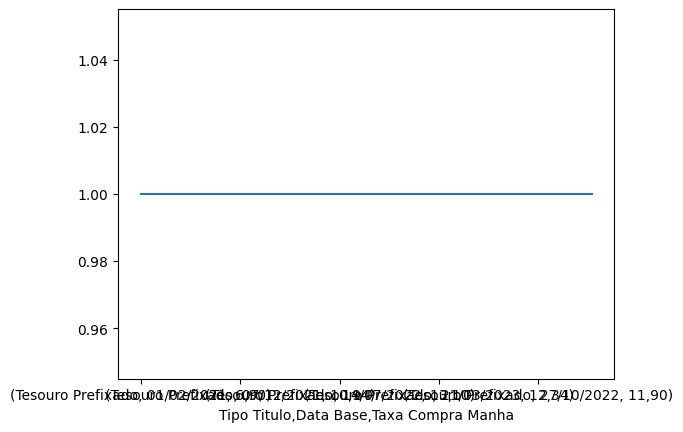

In [66]:
#grafico curva

select_data.plot()


In [ ]:
Q1 = np.percentile(tp['Tesouro Prefixado'],[25,50,75])
Q1
#print('Q2 =',np.quantile('Tesouro Educa+', .50))
#print('Q3 =',np.quantile('Tesouro Educa+', .75))
#print('Q4 =',np.quantile('Tesouro Educa+', .100))

array([1., 1., 1.])